<a href="https://colab.research.google.com/github/MohHasan1/Intro-to-ml-SEA600-/blob/main/ws3/WS03_1_LDA_calculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Discriminant Analysis (LDA) - from scratch

 Linear Discriminant Analysis (LDA), which is a classical supervised machine learning algorithm used for classification tasks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# Dummy features and target (label)
X= np.array([
  [1.20,	0.7],
  [1.00,	0.5],
  [1.10,	0.9],
  [0.9,	1.2],
  [0.8,	1],
  [0.3,	0.4],
  [0.5,	0.2],
  [0.4,	0.3],
  [0.6,	0.1],
  [0.2,	0.5]
  ])
y = [0,0,0,0,0,1,1,1,1,1]

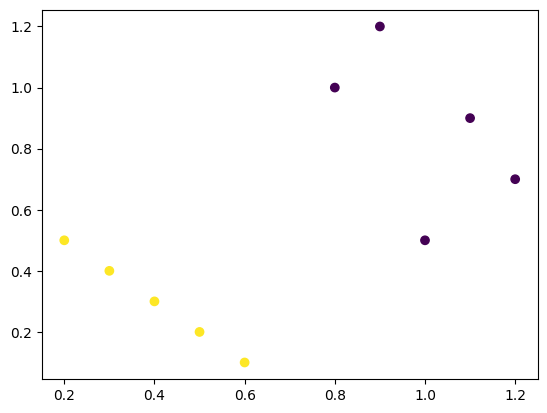

In [21]:
# Plot the - visulaize features (2D)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()
# So, we are not plotting the target y on the y-axis; instead, we're using it only for color differentiation (grouping by class).

In [23]:
# This code calculates the mean (centroid) of two groups in the dataset X, specifically for class 0 (first 5 samples) and class 1 (last 5 samples).
muA = np.mean(X[:5],axis=0) # Column-wise of first 5 rows (Class 0)
muB = np.mean(X[5:],axis=0) # Column-wise Mean of last 5 rows (Class 1)

# we calc the mean to 2 colms [c1, c2] -> which is teh co-ordinate of centroids
print('muA = ', muA)
print('muB = ', muB)

# axis=0 → Mean across rows, keeping each column.
# axis=1 → Mean across columns, keeping each row.

muA =  [1.   0.86]
muB =  [0.4 0.3]


In [5]:
# Center Class 0 data by subtracting the mean (muA) from each row
(X[:5]- muA)
# Centering the data by subtracting the mean shifts the data points around the origin, making the mean of the data zero.

array([[ 0.2 , -0.16],
       [ 0.  , -0.36],
       [ 0.1 ,  0.04],
       [-0.1 ,  0.34],
       [-0.2 ,  0.14]])

In [26]:
# Center and then transpose Class 0 data by subtracting muA
np.transpose((X[:5,:] - muA)) # (5, 2) -> (2, 5)

array([[ 0.2 ,  0.  ,  0.1 , -0.1 , -0.2 ],
       [-0.16, -0.36,  0.04,  0.34,  0.14]])

In [27]:
# Compute the dot product of the centered Class 0 data with itself (after transposing)
result = np.matmul(np.transpose(X[:5, :] - muA), (X[:5, :] - muA)) # (2, 5) . (5, 2) = (2, 2)

# Why: This is calculating the covariance-like matrix for Class 0 (without normalization),
# which can help in understanding the variance and relationships between features.

array([[ 0.1  , -0.09 ],
       [-0.09 ,  0.292]])

In [8]:
# Compute the dot product of the centered Class 1 data with itself (after transposing)
result_B = np.matmul(np.transpose(X[5:, :] - muB), (X[5:, :] - muB))

# Why: This calculates the covariance-like matrix for Class 1 (without normalization),
# showing the relationship between the features in Class 1 (variance and correlation).

array([[ 0.1, -0.1],
       [-0.1,  0.1]])

In [28]:
# Compute the covariance-like matrix for Class 0 and Class 1 (without normalization)
sigma = 1/10 * (np.matmul(np.transpose(X[:5] - muA), (X[:5] - muA)) + np.matmul(np.transpose(X[5:] - muB), (X[5:] - muB)))

# Why: This calculates a combined covariance matrix for both classes (Class 0 and Class 1),
# giving insight into the variance and relationships between features across both classes.

print(sigma)

[[ 0.02   -0.019 ]
 [-0.019   0.0392]]


In [10]:
# Prior probabilities for two classes (Class 0 and Class 1)
p0 = 5.0 / 10  # Prior for Class 0
p1 = 5.0 / 10  # Prior for Class 1

# Function to calculate log-probability (log-likelihood) for a class
def logp(X, prior, mu, sigma):
    """
    Calculate log-probability of X belonging to a class using Gaussian distribution.
    Formula: log(p(X)) = log(prior) - 0.5 * log(2 * pi * |sigma|) - 0.5 * (X - mu)^T * sigma^-1 * (X - mu)
    """
    return np.log(prior) - 0.5 * np.log (2 * prior * np.linalg.norm(sigma)) - 0.5 * np.matmul((X - mu), np.matmul(np.linalg.inv(sigma), np.transpose(X-mu)))

# Function to predict class for each data point based on log-probabilities
def predict(X, p0, p1, muA, muB, sigma):
    """
    Predict class (0 or 1) for each data point in X based on the log-probabilities for both classes.
    Assign class 0 if logp for class 0 is greater, else assign class 1.
    """
    ndata = np.size(X,0)
    predicted = np.zeros([ndata, 1])
    for i in range(ndata):
      if logp(X[i,:], p0, muA, sigma) >= logp(X[i,:], p1, muB, sigma):
        predicted[i] = 0
      else:
        predicted[i] = 1
    return predicted

In [11]:
predict(X, p0, p1, muA, muB, sigma)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

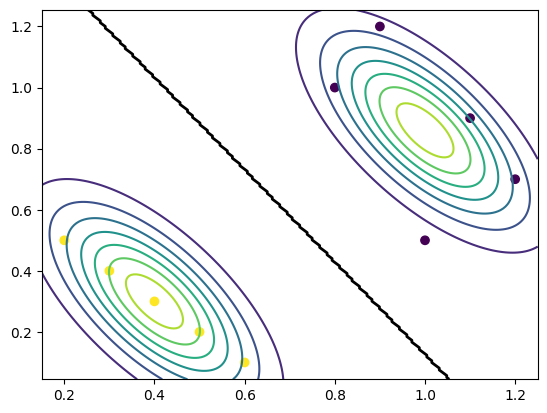

In [31]:
from scipy.stats import multivariate_normal

# Plot the original data points (Class 0 and Class 1) with color indicating the class
plt.scatter(X[:, 0], X[:, 1], c=y)

# Plot the decision boundary
xmin, xmax = plt.xlim()  # Get the x-axis limits
ymin, ymax = plt.ylim()  # Get the y-axis limits
nx, ny = 200, 200  # Define the grid resolution for the plot
xx, yy = np.meshgrid(np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny))  # Create a grid of points in the feature space

# Use the trained classifier (predict function) to classify all the grid points
Z = predict(np.c_[xx.ravel(), yy.ravel()], p0, p1, muA, muB, sigma)  # Classify the grid points
Z = Z.reshape(xx.shape)  # Reshape the predictions to match the grid shape

# Plot the decision boundary where the predicted class is 0.5 (threshold between classes)
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')  # Contour plot to draw the decision boundary

# Plot the Multivariate Normal distribution for each class
for i in range(2):  # Loop for both classes (Class 0 and Class 1)
    mu = muA if i == 0 else muB  # Choose the mean for Class 0 or Class 1
    rv = multivariate_normal(mean=mu, cov=sigma)  # Create a multivariate normal distribution for the class
    data = np.dstack((xx, yy))  # Stack the grid coordinates into a 3D array (for plotting)
    z = rv.pdf(data)  # Compute the probability density for each point in the grid using the class's Gaussian distribution

    # Plot the contour plot for the class's probability density
    plt.contour(xx, yy, z)  # This will show the regions of high and low density for each class

plt.show()  # Display the plot


## Using SKLEARN

In [13]:
# Fit the LDA model
lda = LinearDiscriminantAnalysis(store_covariance=True)  # Initialize LDA model and store the covariance matrix
lda.fit(X, y)  # Fit the model to the data (X: features, y: class labels)

# Print the means of each class
print("Class means:")
print(lda.means_)  # Print the average (mean) feature values for each class

# Print the covariance matrix
print("Covariance matrix:")
print(lda.covariance_)  # Print the covariance matrix showing how features vary together within each class


Class means:
[[1.   0.86]
 [0.4  0.3 ]]
Covariance matrix:
[[ 0.02   -0.019 ]
 [-0.019   0.0392]]


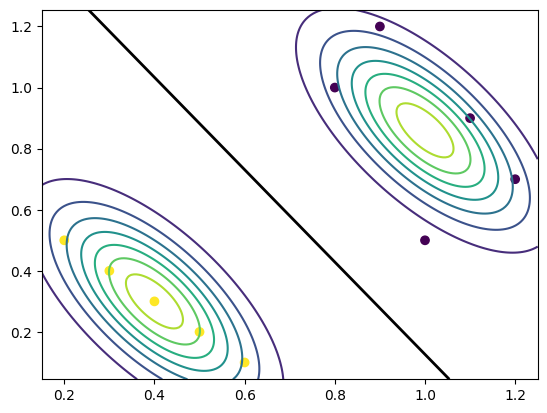

In [32]:
from scipy.stats import multivariate_normal  # Import the multivariate_normal class to work with multivariate normal distributions

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y)  # Plot the data points, coloring by the target variable 'y'

# Plot the decision boundary
xmin, xmax = plt.xlim()  # Get the current limits of the x-axis
ymin, ymax = plt.ylim()  # Get the current limits of the y-axis
nx, ny = 200, 200  # Define the resolution of the grid (200x200 points)
xx, yy = np.meshgrid(np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny))  # Create a meshgrid for the 2D space

# Calculate the predicted probabilities over the meshgrid
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])  # Get the probability predictions for each point on the grid
Z = Z[:, 1].reshape(xx.shape)  # Extract the probability of class 1 (second column) and reshape to match grid shape
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')  # Plot the decision boundary where the probability is 0.5 (class boundary)

# Plot the multivariate normal (MV) distribution for each class
for i in range(2):  # Iterate through the two classes (0 and 1)
  mu = lda.means_[i]  # Get the mean vector for class 'i' from the LDA model
  sigma = lda.covariance_  # Get the covariance matrix for the model (assumed same for both classes in LDA)
  rv = multivariate_normal(mean=mu, cov=sigma)  # Create a multivariate normal distribution for class 'i' with mean and covariance
  data = np.dstack((xx, yy))  # Stack the meshgrid data to match the required shape for the PDF calculation
  z = rv.pdf(data)  # Compute the probability density function (PDF) over the meshgrid for this class
  plt.contour(xx, yy, z)  # Plot the contour lines of the PDF

# Show the final plot
plt.show()
